# SAEval

In [1]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

## Sufficency / Necessity

In [2]:
dfs = [] 
for file in os.listdir('tasks/ioi/sn-scores/'):
    if file.endswith('.json'):
        file_name = file.split('.')[0]
        data = pd.read_json('tasks/ioi/sn-scores/' + file)
        data['node'] = file_name
        dfs.append(data)

df = pd.concat(dfs, ignore_index=True)

In [3]:
sufficency_df = df[['node', 'clean_ld', 'supervised_full_ld', 'sae_full_ld']].copy()
necessity_df = df[['node', 'clean_ld', 'supervised_average_ld', 'sae_average_ld', 'ablation_ld']].copy()

In [4]:
sufficency_df['supervised_diff'] = sufficency_df['clean_ld'] - sufficency_df['supervised_full_ld']
sufficency_df['sae_diff'] = sufficency_df['clean_ld'] - sufficency_df['sae_full_ld']

sufficency_df = sufficency_df.groupby('node').mean()

In [5]:
sufficency_df['supervised_score'] = sufficency_df['supervised_diff'] / sufficency_df['clean_ld']
sufficency_df['sae_score'] = sufficency_df['sae_diff'] / sufficency_df['clean_ld']

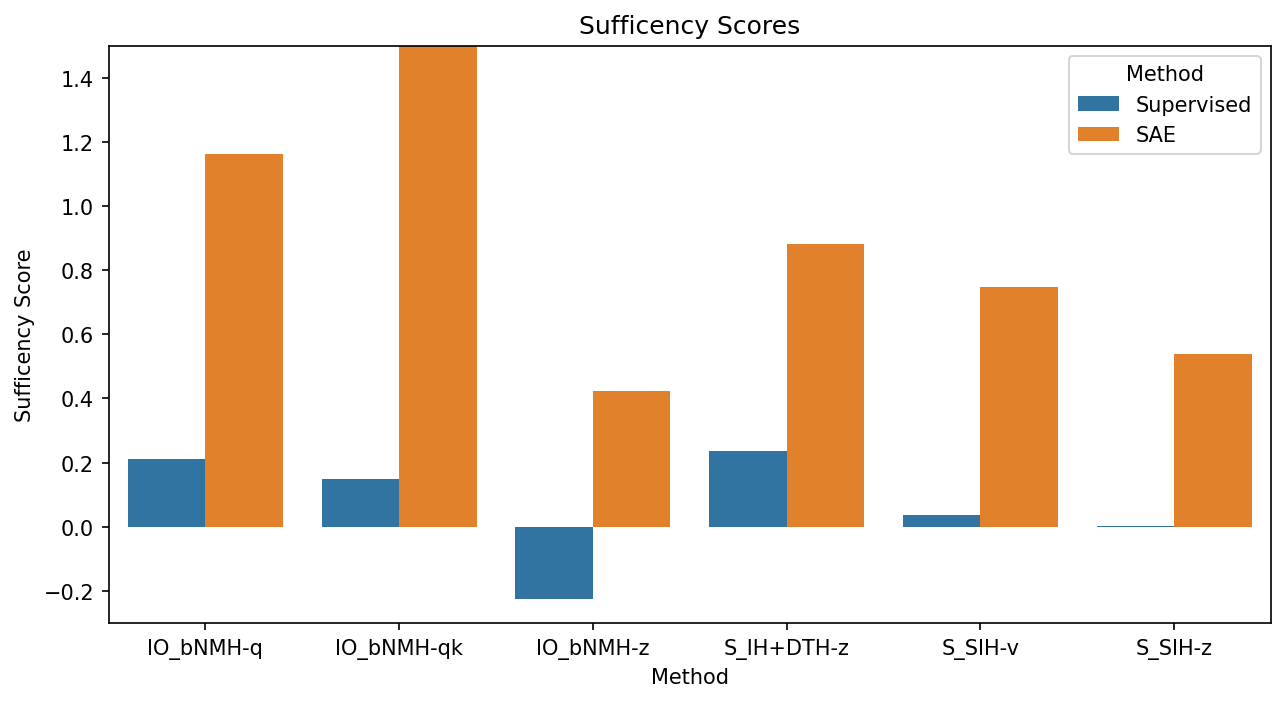

In [7]:
scores = sufficency_df[['supervised_score', 'sae_score']].reset_index()
scores.columns = ['Node', 'Supervised', 'SAE']

plt.figure(figsize=(10, 5), dpi=150)
ax = sns.barplot(data=scores.melt(id_vars='Node', var_name='Method', value_name='Sufficency Score'), x='Node', y='Sufficency Score', hue='Method')
ax.set(xlabel='Method', ylabel='Sufficency Score')
plt.ylim(-.3, 1.5)
plt.title('Sufficency Scores')
plt.show()

In [8]:
necessity_df['supervised_diff'] = necessity_df['clean_ld'] - necessity_df['supervised_average_ld']
necessity_df['sae_diff'] = necessity_df['clean_ld'] - necessity_df['sae_average_ld']
necessity_df['ablation_diff'] = necessity_df['clean_ld'] - necessity_df['ablation_ld']

necessity_df = necessity_df.groupby('node').mean()

In [9]:
necessity_df['supervised_score'] = necessity_df['supervised_diff'] / necessity_df['ablation_diff']
necessity_df['sae_score'] = necessity_df['sae_diff'] / necessity_df['ablation_diff']

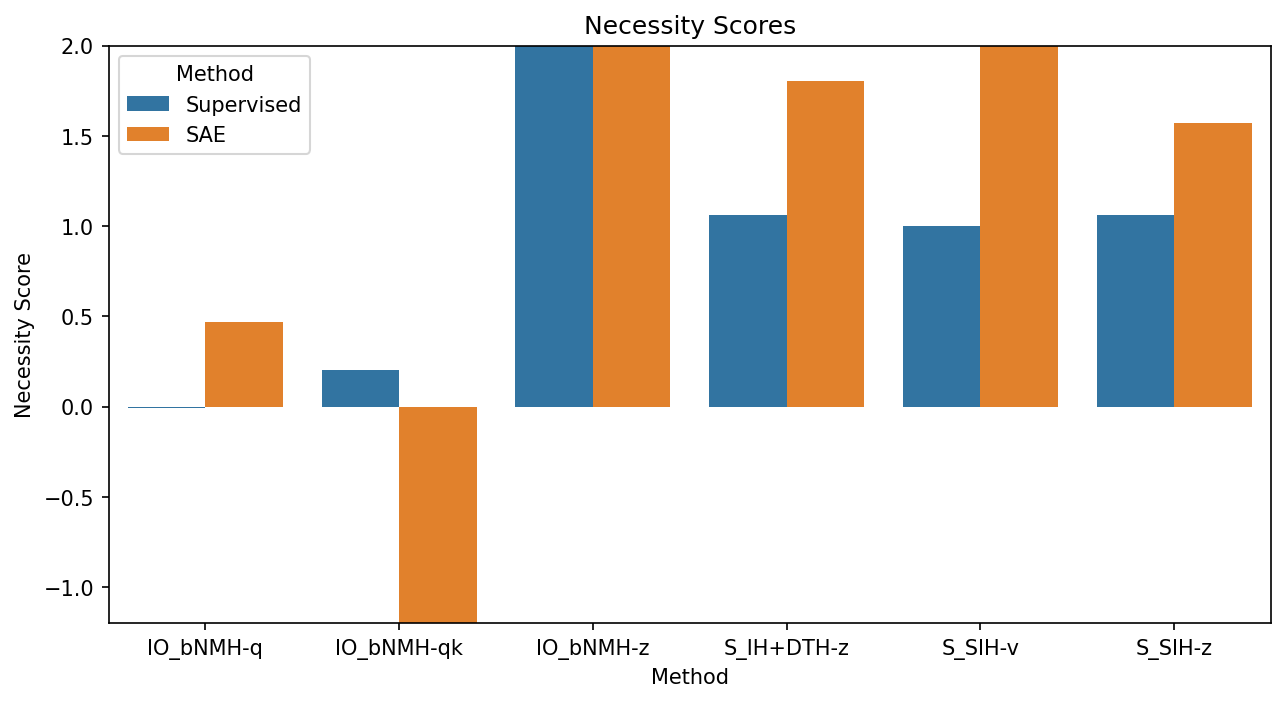

In [12]:
scores = necessity_df[['supervised_score', 'sae_score']].reset_index()
scores.columns = ['Node', 'Supervised', 'SAE']

plt.figure(figsize=(10, 5), dpi=150)
ax = sns.barplot(data=scores.melt(id_vars='Node', var_name='Method', value_name='Sufficency Score'), x='Node', y='Sufficency Score', hue='Method')
ax.set(xlabel='Method', ylabel='Necessity Score')
plt.ylim(-1.2, 2)
plt.title('Necessity Scores')
plt.show()

## Sparse Controllability

In [13]:
dfs = [] 
for file in os.listdir('tasks/ioi/sc-scores/'):
    if file.endswith('.json'):
        file_name = file.split('.')[0]
        data = pd.read_json('tasks/ioi/sc-scores/' + file)
        data['node'] = file_name
        dfs.append(data)

df = pd.concat(dfs, ignore_index=True)

/tmp/ipykernel_72021/2105426135.py:6: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  ax = sns.barplot(data=plot_df, x='Node', y='Score', hue='Method', errwidth=0.5)


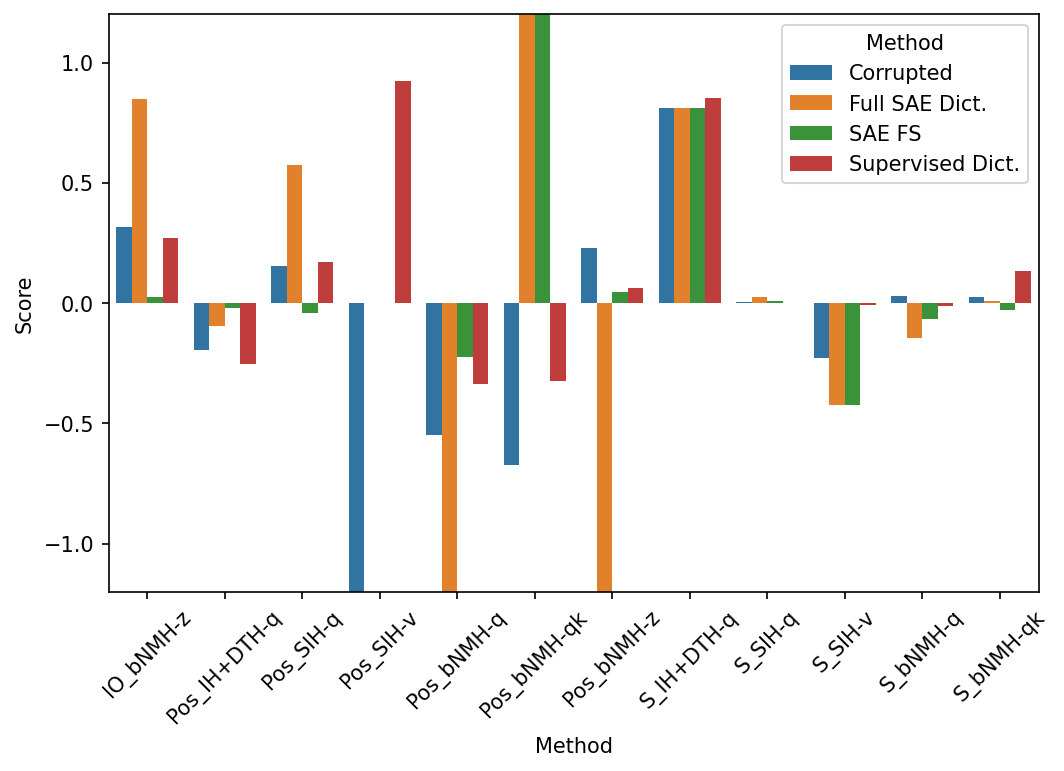

In [14]:
scores = df[['patch_corr_score', 'patch_supervised_score', 'patch_all_sae_score', 'patch_sae_fs_score', 'node']]
scores.columns = ['Corrupted', 'Supervised Dict.', 'Full SAE Dict.', 'SAE FS', 'Node']

plt.figure(figsize=(8, 5), dpi=150)
plot_df = scores.melt(id_vars='Node', var_name='Method', value_name='Score').groupby(['Node', 'Method']).mean().reset_index()
ax = sns.barplot(data=plot_df, x='Node', y='Score', hue='Method', errwidth=0.5)
ax.set_ylabel('Score')
ax.set_xlabel('Method')
plt.ylim(-1.2, 1.2)
plt.xticks(rotation=45)
plt.show()

In [15]:
ldiff = data[['corr_ld', 'patch_corr_ld', 'patch_supervised_ld', 'patch_all_sae_ld', 'patch_sae_fs_ld']]
ldiff.columns = ['Corrupted Run', 'Patch Corrupted', 'Supervised Dict.', 'Full SAE Dict.', 'SAE FS']
mask = data['clean_ld'] > 0
for col in ldiff.columns:
    ldiff.loc[mask, col] = ldiff.loc[mask, col] * data.loc[mask, 'clean_ld']

/tmp/ipykernel_72021/3572716217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldiff.loc[mask, col] = ldiff.loc[mask, col] * data.loc[mask, 'clean_ld']


Text(0.5, 1.0, 'Agreements with clean run')

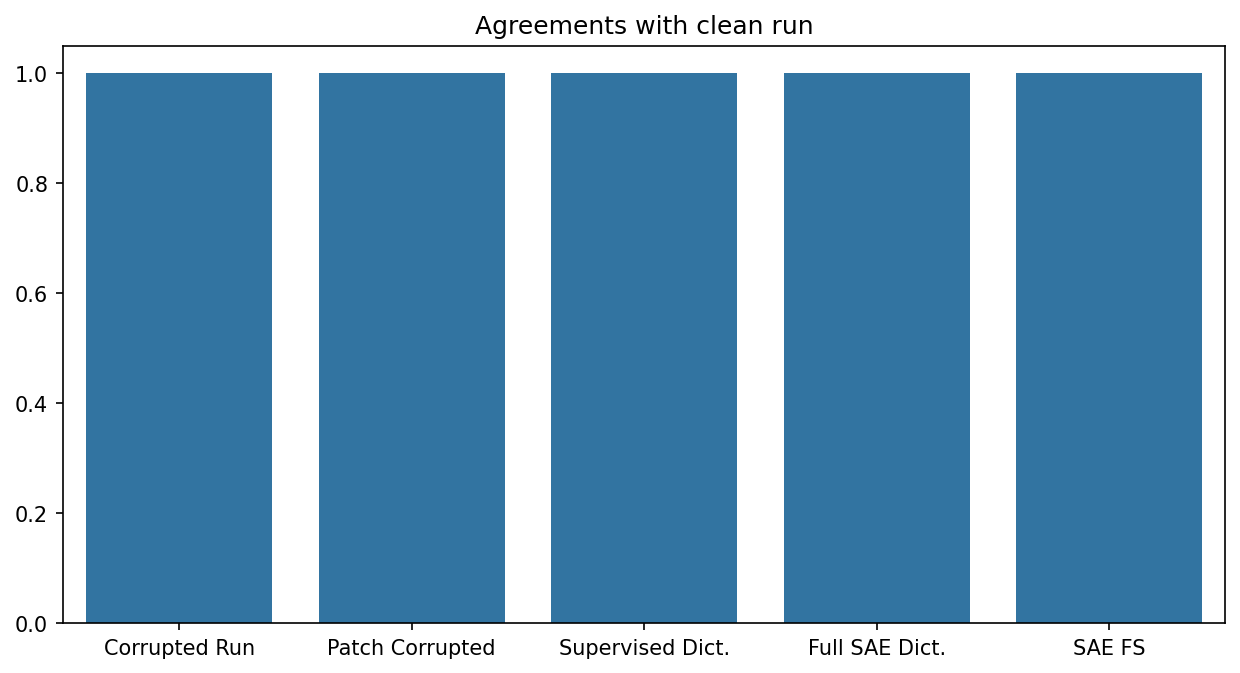

In [16]:
plt.figure(figsize=(10, 5), dpi=150)
sns.barplot((1-ldiff < 0).mean())
plt.title('Agreements with clean run')

In [17]:
ldiff = data[['clean_ld', 'patch_corr_ld', 'patch_supervised_ld', 'patch_all_sae_ld', 'patch_sae_fs_ld']]
ldiff.columns = ['Clean Run', 'Patch Corrupted', 'Supervised Dict.', 'Full SAE Dict.', 'SAE FS']
mask = data['clean_ld'] > 0
for col in ldiff.columns:
    ldiff.loc[mask, col] = ldiff.loc[mask, col] * data.loc[mask, 'corr_ld']

/tmp/ipykernel_72021/3009254340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldiff.loc[mask, col] = ldiff.loc[mask, col] * data.loc[mask, 'corr_ld']


Text(0.5, 1.0, 'Agreements with corrupted run')

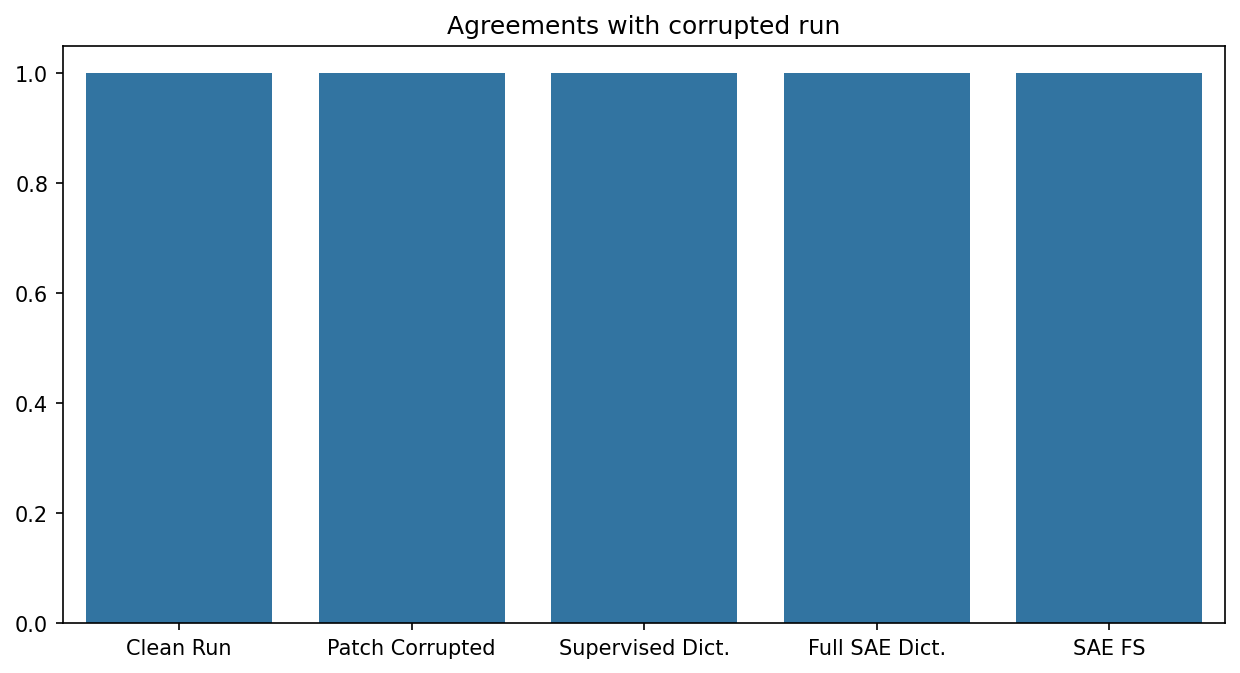

In [18]:
plt.figure(figsize=(10, 5), dpi=150)
sns.barplot((1-ldiff < 0).mean())
plt.title('Agreements with corrupted run')

Agreement Histogram for Full SAE Dict []


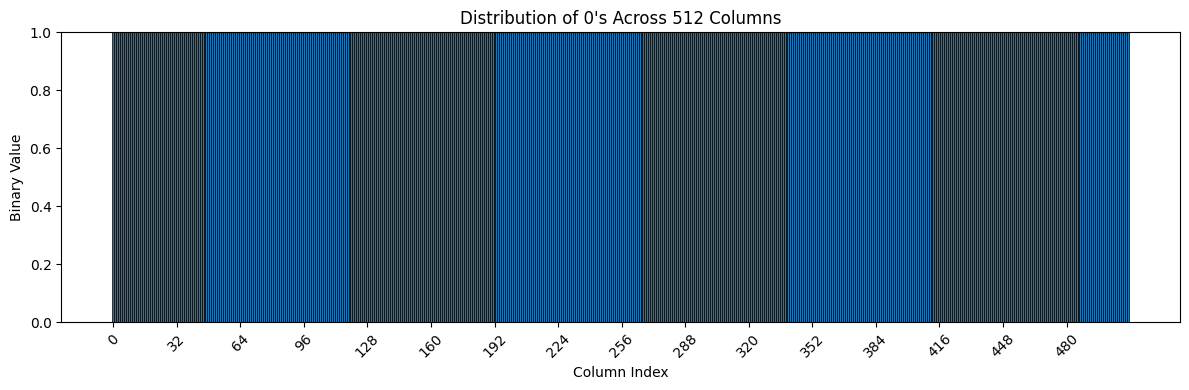

In [20]:
import numpy as np
import matplotlib.pyplot as plt

ldiff_dist = np.array((1-ldiff["Full SAE Dict."] < 0))
indices = np.where(ldiff_dist == 0)
print(f"Agreement Histogram for Full SAE Dict {indices[0]}")

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(range(512), ldiff_dist.flatten(), width=1, edgecolor='black', linewidth=0.5)
ax.set(xlabel='Column Index', xticks=range(0, 512, 32), xticklabels=range(0, 512, 32), 
       ylabel='Binary Value', ylim=(0, 1), title='Distribution of 0\'s Across 512 Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
